![Astrofisica Computacional](../../logo.png)

---
## 05. csv Files in Julia

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we present an introduction to the use of .csv files using `julia`.

---

In [4]:
using DataFrames
using CSV
using Plots

## The `Dataframe` type

In [5]:
df = DataFrame(A=1:4, B=["M", "F", "F", "M"])
df

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M


In [34]:
df = DataFrame()

""
""


In [35]:
df."name"= ["Earth", "Mars", "Jupiter"]

3-element Vector{String}:
 "Earth"
 "Mars"
 "Jupiter"

In [36]:
df

,name
,String
1,Earth
2,Mars
3,Jupiter


In [38]:
# Some data about planets
# mass in [Earth masses]
# orbital period in [Earth years]
# mean distance tu Sun in [au]

df."mass" = [1., 0.107, 317.8]
df."period" = [1., 1.88, 11.86]
df."distance" = [1., 1.5, 5.2]

df

,name,mass,period,distance
,String,Float64,Float64,Float64
1,Earth,1.0,1.0,1.0
2,Mars,0.107,1.88,1.5
3,Jupiter,317.8,11.86,5.2


### Accesing Features  (`Series`)

In [39]:
df."mass"

3-element Vector{Float64}:
   1.0
   0.107
 317.8

In [41]:
# Mass * 5.972e24 = Mass in kg

df."mass" * 5.972e24

3-element Vector{Float64}:
 5.972e24
 6.39004e23
 1.8979016000000002e27

In [42]:
df

,name,mass,period,distance
,String,Float64,Float64,Float64
1,Earth,1.0,1.0,1.0
2,Mars,0.107,1.88,1.5
3,Jupiter,317.8,11.86,5.2


In [44]:
df."mass [kg]" = df."mass" * 5.972e24
df

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Earth,1.0,1.0,1.0,5.972e24
2,Mars,0.107,1.88,1.5,6.39004e23
3,Jupiter,317.8,11.86,5.2,1.8979e27


In [45]:
# Add a row to the dataframe
push!(df,["Venus", 0.815, 0.62, 0.72, 0.815*5.972e24])
df

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Earth,1.0,1.0,1.0,5.972e24
2,Mars,0.107,1.88,1.5,6.39004e23
3,Jupiter,317.8,11.86,5.2,1.8979e27
4,Venus,0.815,0.62,0.72,4.86718e24


## Examining a `DataFrame`

In [46]:
# Names of the features (columns)
names(df)

5-element Vector{String}:
 "name"
 "mass"
 "period"
 "distance"
 "mass [kg]"

In [47]:
# Size of the Dataframe
size(df)

(4, 5)

In [49]:
sort!(df, "distance")

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Venus,0.815,0.62,0.72,4.86718e24
2,Earth,1.0,1.0,1.0,5.972e24
3,Mars,0.107,1.88,1.5,6.39004e23
4,Jupiter,317.8,11.86,5.2,1.8979e27


In [50]:
df

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Venus,0.815,0.62,0.72,4.86718e24
2,Earth,1.0,1.0,1.0,5.972e24
3,Mars,0.107,1.88,1.5,6.39004e23
4,Jupiter,317.8,11.86,5.2,1.8979e27


### Looking into the data

In [51]:
first(df,3) # First entries

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Venus,0.815,0.62,0.72,4.86718e24
2,Earth,1.0,1.0,1.0,5.972e24
3,Mars,0.107,1.88,1.5,6.39004e23


In [52]:
last(df,2) # Last entries

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Mars,0.107,1.88,1.5,6.39004e23
2,Jupiter,317.8,11.86,5.2,1.8979e27


In [57]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,name,,Earth,,Venus,0,String
2,mass,79.9305,0.107,0.9075,317.8,0,Float64
3,period,3.84,0.62,1.44,11.86,0,Float64
4,distance,2.105,0.72,1.25,5.2,0,Float64
5,mass [kg],4.77345e26,6.39004e23,5.41959e24,1.8979e27,0,Float64


## Indexing and Slicing

There are different ways to index/slice data in pandas.

In [54]:
df[1:2,:]

,name,mass,period,distance,mass [kg]
,String,Float64,Float64,Float64,Float64
1,Venus,0.815,0.62,0.72,4.86718e24
2,Earth,1.0,1.0,1.0,5.972e24


In [55]:
df[1:2, 2:3]

,mass,period
,Float64,Float64
1,0.815,0.62
2,1.0,1.0


In [56]:
df[1:2,["name", "mass"]]

,name,mass
,String,Float64
1,Venus,0.815
2,Earth,1.0


---
## Reading a File 

We will use, as an example, a catalog of all official named stars collected by the IAU in .csv format available at
https://www.kaggle.com/ecotner/named-stars 

This catalog contains 330 stars and the following columns:

* **Name**: Proper name adopted by IAU Working Group on Star Names (WGSN).

* **Designation**: Fiducial designation (in order of preference and availability):
HR, GJ, HD, HIP, PSR. (see SIMBAD; http://simbad.u-strasbg.fr/simbad/).

* **ID**: ID column is either (in order of preference and availability)
Bayer greek letter (using SIMBAD databases; e.g. "alf" = alpha; see table http://simbad.u-strasbg.fr/Pages/guide/chA.htx), Flamsteed numbers (both following The Bright Star Catalogue [BSC], 5th Revised Ed. (Hoffleit & Warren 1991), or variable star designations.

* **Con**: Constellation (3-letter IAU abbrev.; following "The IAU Style Manual", Wilkins 1989, Table 11).

* **#**: The "#" after the constellation column is the component ID to Washington Double Star (WDS) catalog multiple system, if needed (e.g. Proxima Centauri = alf Cen "C"), but may be left blank ("-") where the primary, by visual brightness, is unambiguous (blank = A) or if the other WDS catalogue entries are obviously unphysical (i.e. the star appears to have no known physical stellar companions). Component IDs are also given where the star does not have a WDS entry (i.e. is not a resolved multiple), but the star is either known to be a spectroscopic binary or astrometric binary in the literature (usually a "A" or "Aa" is given in those cases, e.g. Wezen). Many thanks to Brian Mason (IAU Commission G1 Binary and Multiple Star Systems) for help with vetting the WDS designations and IDs.

* **WDS_J**: WDS designation for multiple systems (or candidate multiple systems), the official double star catalogue of IAU Commission 26 (now G1).

* **Vmag**: Johnson V magnitude. For multiple stars, the V magnitude of the component is listed where available or calculable, however in some cases (e.g. some spectroscopic binaries, astrometric binaries), the unresolved magnitude is listed. Magnitudes are preferentially from The Hipparcos and Tycho catalogues (ESA 1997) and WDS.

* **HIP**: HIP designations from The Hipparcos and Tycho Catalogues (ESA 1997).

* **HD**: HD designations, usually cross-identified from SIMBAD, BSC, HIP catalogues.

* **RA(J2000)**: Right Ascension, ICRS (epoch 2000.0)

* **Dec(J2000)**: Declination, ICRS (epoch 2000.0)Columns 10 and 11 are calculated with Vizier for epoch 2000.0, usually using positions and proper motions from the revised Hipparcos catalogue ("Hipparcos, the New Reduction of the Raw Data" (van Leeuwen 2007 A&A, 474, 653), Gaia DR1 (Gaia Collaboration 2016) or Tycho-2 catalogue (Hog et al. 2000, A&A, 355, L27).

* **Date**: Date approved by WGSN. Names marked approved "2015-12-15" are exoplanet host star names - a mix of common names and names adopted via the NameExoWorlds contest - reviewed and adopted by the Executive Committee WG Public Naming of Planets and Planetary Satellites, and recognized by WGSN (although the posted date pre-dates WGSN).

In [58]:
using CSV
df = DataFrame(CSV.File("IAU-CSN.csv"))
df

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
2,1,Achernar,HR 472,alf,Eri,A,-,0.45
3,2,Achird,HR 219,eta,Cas,A,00491+5749,3.46
4,3,Acrab,HR 5984,bet,Sco,Aa,16054-1948,2.56
5,4,Acrux,HR 4730,alf,Cru,Aa,12266-6306,1.33
6,5,Acubens,HR 3572,alf,Cnc,Aa,08585+1151,4.26
7,6,Adhafera,HR 4031,zet,Leo,Aa,10167+2325,3.43
8,7,Adhara,HR 2618,eps,CMa,A,06586-2858,1.50
9,8,Adhil,HR 390,ksi,And,-,-,4.87


In [59]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Column1,164.5,0,164.5,329,0,Int64
2,Name,,Acamar,,Zubeneschamali,0,String31
3,Designation,,GJ 551,,PSR B1257+12,0,String15
4,ID,,-,,zet01,0,String7
5,Con,,And,,Vul,0,String3
6,#,,-,,_,0,String3
7,WDS_J,,-,,_,0,String15
8,Vmag,,-,,9.54,0,String7
9,HIP,,-,,9884,0,String7


In [61]:
df[1:10,:]

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
2,1,Achernar,HR 472,alf,Eri,A,-,0.45
3,2,Achird,HR 219,eta,Cas,A,00491+5749,3.46
4,3,Acrab,HR 5984,bet,Sco,Aa,16054-1948,2.56
5,4,Acrux,HR 4730,alf,Cru,Aa,12266-6306,1.33
6,5,Acubens,HR 3572,alf,Cnc,Aa,08585+1151,4.26
7,6,Adhafera,HR 4031,zet,Leo,Aa,10167+2325,3.43
8,7,Adhara,HR 2618,eps,CMa,A,06586-2858,1.50
9,8,Adhil,HR 390,ksi,And,-,-,4.87


---
## Group data

We may group the data acording to some criteria. For example, 'Constellation':

In [72]:
sort(df, "Con")

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,8,Adhil,HR 390,ksi,And,-,-,4.87
2,38,Almach,HR 603,gam,And,A,02039+4220,2.10
3,46,Alpheratz,HR 15,alf,And,Aa,00084+2905,2.07
4,205,Mirach,HR 337,bet,And,-,01097+3537,2.07
5,220,Nembus,HR 464,51,And,-,-,3.59
6,302,Titawin,HR 458,ups,And,A,01368+4124,4.09
7,310,Veritate,HR 8930,14,And,A,23313+3914,5.22
8,54,Alshain,HR 7602,bet,Aql,A,19553+0624,3.71
9,56,Altair,HR 7557,alf,Aql,-,19508+0852,0.76


If we want to get some specific group:

In [73]:
df[df."Con" .== "Sgr",:]

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,10,Ainalrami,HR 7116,nu01,Sgr,A,18542-2245,4.86
2,12,Albaldah,HR 7264,pi,Sgr,A,19098-2101,2.88
3,40,Alnasl,HR 6746,gam02,Sgr,-,-,2.98
4,70,Arkab Posterior,HR 7343,bet02,Sgr,-,-,4.27
5,71,Arkab Prior,HR 7337,bet01,Sgr,-,19226-4428,3.96
6,73,Ascella,HR 7194,zet,Sgr,A,19026-2953,2.60
7,162,Kaus Australis,HR 6879,eps,Sgr,A,18242-3423,1.79
8,163,Kaus Borealis,HR 6913,lam,Sgr,-,18280-2525,2.82
9,164,Kaus Media,HR 6859,del,Sgr,-,18210-2950,2.72


In [74]:
Cyg_df = df[df."Con" .== "Sgr",:]
Cyg_df

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,10,Ainalrami,HR 7116,nu01,Sgr,A,18542-2245,4.86
2,12,Albaldah,HR 7264,pi,Sgr,A,19098-2101,2.88
3,40,Alnasl,HR 6746,gam02,Sgr,-,-,2.98
4,70,Arkab Posterior,HR 7343,bet02,Sgr,-,-,4.27
5,71,Arkab Prior,HR 7337,bet01,Sgr,-,19226-4428,3.96
6,73,Ascella,HR 7194,zet,Sgr,A,19026-2953,2.60
7,162,Kaus Australis,HR 6879,eps,Sgr,A,18242-3423,1.79
8,163,Kaus Borealis,HR 6913,lam,Sgr,-,18280-2525,2.82
9,164,Kaus Media,HR 6859,del,Sgr,-,18210-2950,2.72


Now, we will group the data according to the 'Vmag' feature

In [75]:
sort!(Cyg_df,"Vmag")

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,162,Kaus Australis,HR 6879,eps,Sgr,A,18242-3423,1.79
2,222,Nunki,HR 7121,sig,Sgr,Aa,18553-2618,2.05
3,73,Ascella,HR 7194,zet,Sgr,A,19026-2953,2.60
4,164,Kaus Media,HR 6859,del,Sgr,-,18210-2950,2.72
5,163,Kaus Borealis,HR 6913,lam,Sgr,-,18280-2525,2.82
6,12,Albaldah,HR 7264,pi,Sgr,A,19098-2101,2.88
7,40,Alnasl,HR 6746,gam02,Sgr,-,-,2.98
8,235,Polis,HR 6812,mu,Sgr,Aa,18138-2104,3.84
9,71,Arkab Prior,HR 7337,bet01,Sgr,-,19226-4428,3.96


Note that there is one sample with a non-numerical value: item \[175\] has 'Vmag' = '-'.

In [78]:
df[df."Vmag" .== "-",:]

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag,HIP
,Int64,String31,String15,String7,String3,String3,String15,String7,String7
1,175,Lich,PSR B1257+12,-,Vir,-,-,-,-


In [80]:
df[df."Vmag" .== "1.25",:]

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,116,Deneb,HR 7924,alf,Cyg,-,20414+4517,1.25
2,200,Mimosa,HR 4853,bet,Cru,-,12477-5941,1.25


---


Note that RA and Dec are the only columns with numerical values. The other columns are identified as 'object'. 

If we want to transform the data type of column 'Vmag' we need to get rid of the row \[175\] which has a non-numerical value. hence, we use the `.drop()` method.

In [85]:
df

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
2,1,Achernar,HR 472,alf,Eri,A,-,0.45
3,2,Achird,HR 219,eta,Cas,A,00491+5749,3.46
4,3,Acrab,HR 5984,bet,Sco,Aa,16054-1948,2.56
5,4,Acrux,HR 4730,alf,Cru,Aa,12266-6306,1.33
6,5,Acubens,HR 3572,alf,Cnc,Aa,08585+1151,4.26
7,6,Adhafera,HR 4031,zet,Leo,Aa,10167+2325,3.43
8,7,Adhara,HR 2618,eps,CMa,A,06586-2858,1.50
9,8,Adhil,HR 390,ksi,And,-,-,4.87


In [86]:
df = df[df."Vmag" .!= "-",:]
df

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,String7
1,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
2,1,Achernar,HR 472,alf,Eri,A,-,0.45
3,2,Achird,HR 219,eta,Cas,A,00491+5749,3.46
4,3,Acrab,HR 5984,bet,Sco,Aa,16054-1948,2.56
5,4,Acrux,HR 4730,alf,Cru,Aa,12266-6306,1.33
6,5,Acubens,HR 3572,alf,Cnc,Aa,08585+1151,4.26
7,6,Adhafera,HR 4031,zet,Leo,Aa,10167+2325,3.43
8,7,Adhara,HR 2618,eps,CMa,A,06586-2858,1.50
9,8,Adhil,HR 390,ksi,And,-,-,4.87


and now we transform the dtype of the 'Vmag' column to float:

In [90]:
df."Vmag" = parse.(Float64,df."Vmag")
df

329-element Vector{Float64}:
 2.88
 0.45
 3.46
 2.56
 1.33
 4.26
 3.43
 1.5
 4.87
 3.53
 4.86
 4.43
 2.88
 ⋮
 3.23
 2.73
 4.35
 4.6
 2.97
 3.59
 4.11
 4.8
 2.56
 2.75
 3.91
 2.61

In [92]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,DataType
1,Column1,164.468,0,164.0,329,0,Int64
2,Name,,Acamar,,Zubeneschamali,0,String31
3,Designation,,GJ 551,,HR 99,0,String15
4,ID,,-,,zet01,0,String7
5,Con,,And,,Vul,0,String3
6,#,,-,,_,0,String3
7,WDS_J,,-,,_,0,String15
8,Vmag,3.32845,-1.45,3.37,11.01,0,Float64
9,HIP,,100064,,9884,0,String7


---
Lets now group the data by Constellation and find the maximum value of 'Vmag' in each one,

In [94]:
grouped_df = groupby(df,"Con")
grouped_df

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,Float64
1,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
2,1,Achernar,HR 472,alf,Eri,A,-,0.45
3,65,Angetenar,HR 850,tau02,Eri,-,02510-2100,4.76
4,85,Azha,HR 874,eta,Eri,-,-,3.89
5,89,Beemim,HR 1393,ups03,Eri,-,-,3.97
6,90,Beid,HR 1298,omi01,Eri,-,-,4.04
7,113,Cursa,HR 1666,bet,Eri,-,05078-0505,2.78
8,165,Keid,HR 1325,omi02,Eri,A,04153-0739,4.43
9,243,Ran,HR 1084,eps,Eri,-,03329-0927,3.73


In [97]:
grouped_df[1]

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,Float64
1,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
2,1,Achernar,HR 472,alf,Eri,A,-,0.45
3,65,Angetenar,HR 850,tau02,Eri,-,02510-2100,4.76
4,85,Azha,HR 874,eta,Eri,-,-,3.89
5,89,Beemim,HR 1393,ups03,Eri,-,-,3.97
6,90,Beid,HR 1298,omi01,Eri,-,-,4.04
7,113,Cursa,HR 1666,bet,Eri,-,05078-0505,2.78
8,165,Keid,HR 1325,omi02,Eri,A,04153-0739,4.43
9,243,Ran,HR 1084,eps,Eri,-,03329-0927,3.73


In [110]:
sort(grouped_df[1], "Vmag")

,Column1,Name,Designation,ID,Con,#,WDS_J,Vmag
,Int64,String31,String15,String7,String3,String3,String15,Float64
1,1,Achernar,HR 472,alf,Eri,A,-,0.45
2,113,Cursa,HR 1666,bet,Eri,-,05078-0505,2.78
3,0,Acamar,HR 897,tet01,Eri,A,02583-4018,2.88
4,322,Zaurak,HR 1231,gam,Eri,-,03580-1331,2.97
5,243,Ran,HR 1084,eps,Eri,-,03329-0927,3.73
6,297,Theemin,HR 1464,ups02,Eri,-,-,3.81
7,85,Azha,HR 874,eta,Eri,-,-,3.89
8,89,Beemim,HR 1393,ups03,Eri,-,-,3.97
9,266,Sceptrum,HR 1481,53,Eri,A,04382-1418,4.02


## Plotting

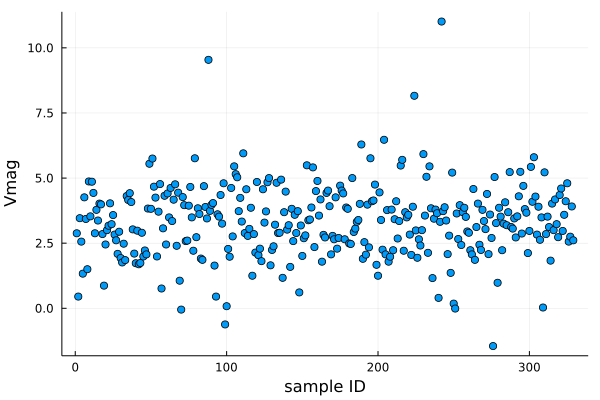

In [120]:
scatter(df."Vmag",xlabel="sample ID", ylabel="Vmag", label=false)

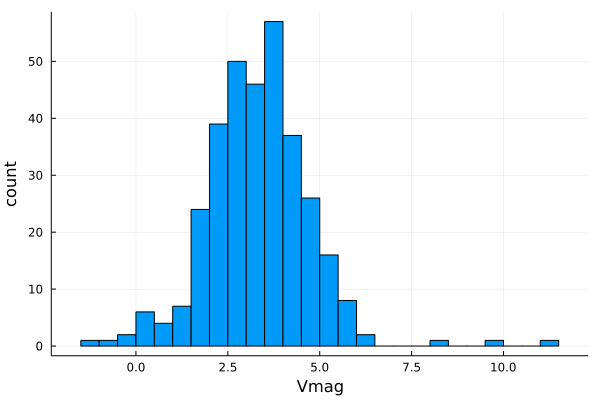

In [121]:
histogram(df."Vmag", xlabel = "Vmag", ylabel="count", label=false)